In [1]:
import numpy as np
import mne
import pandas as pd
from matplotlib import pyplot as plt
from helpers import map_ft9
# plt.style.use('dark_background')

In [2]:
filename = "dataset/chb01/chb01_03.edf"
raw_data = mne.io.read_raw_edf(filename, preload=True)

Extracting EDF parameters from /Users/raunavghosh/Documents/Estimation and Detection/Estimation-and-Detection/dataset/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_29508/2878033458.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(filename, preload=True)


In [3]:
raw_data

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>

In [4]:
print("Channal names:")
print("\n".join(raw_data.ch_names))

Channal names:
FP1-F7
F7-T7
T7-P7
P7-O1
FP1-F3
F3-C3
C3-P3
P3-O1
FP2-F4
F4-C4
C4-P4
P4-O2
FP2-F8
F8-T8
T8-P8-0
P8-O2
FZ-CZ
CZ-PZ
P7-T7
T7-FT9
FT9-FT10
FT10-T8
T8-P8-1


- "T8-P8" channel exists twice

# Raw to Dataframe(Pandas)

In [5]:
data, labels = map_ft9(raw_data)

In [6]:
data.shape

(15, 921600)

In [7]:
data[0, :].shape

(921600,)

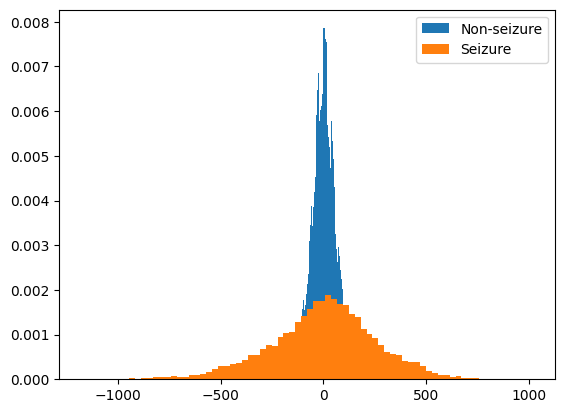

In [8]:
# plt.
plt.hist(np.concatenate((data[10, :7_66_976], data[10, 7_77_216:])), bins='auto', density=True)
plt.hist(data[10, 7_66_976:7_77_216], bins='auto', density=True)
plt.legend(["Non-seizure", "Seizure"])
plt.show()

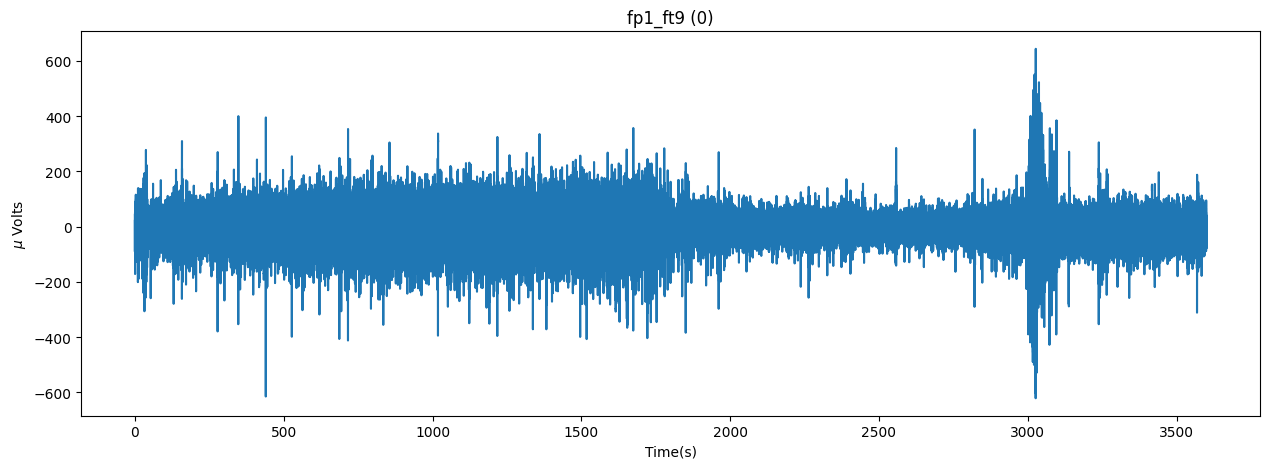

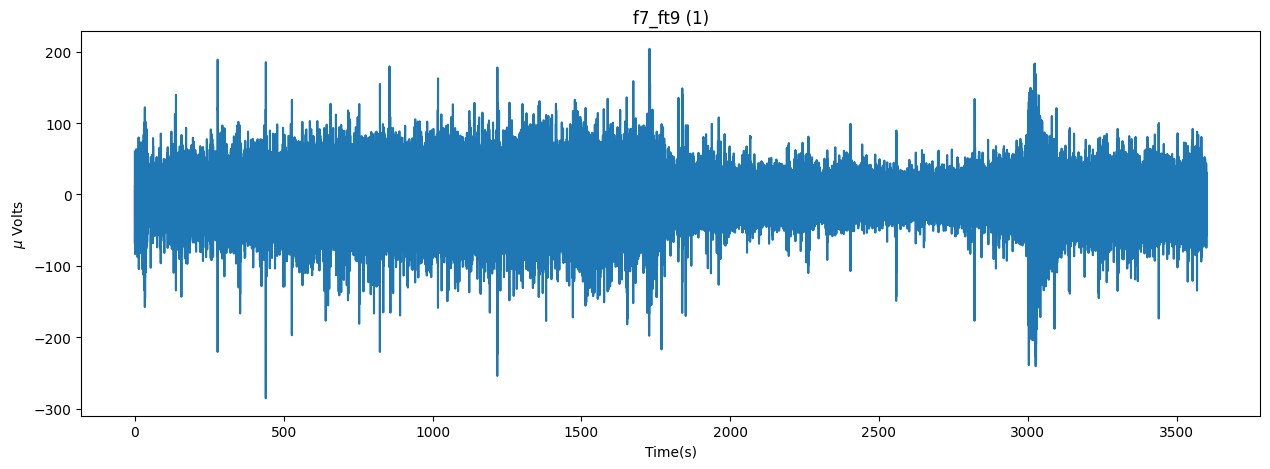

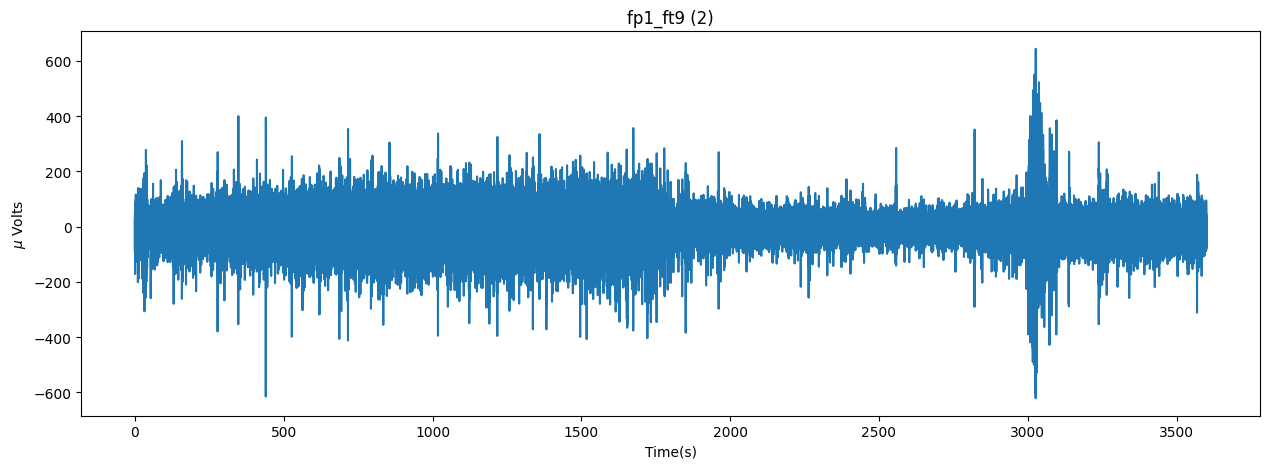

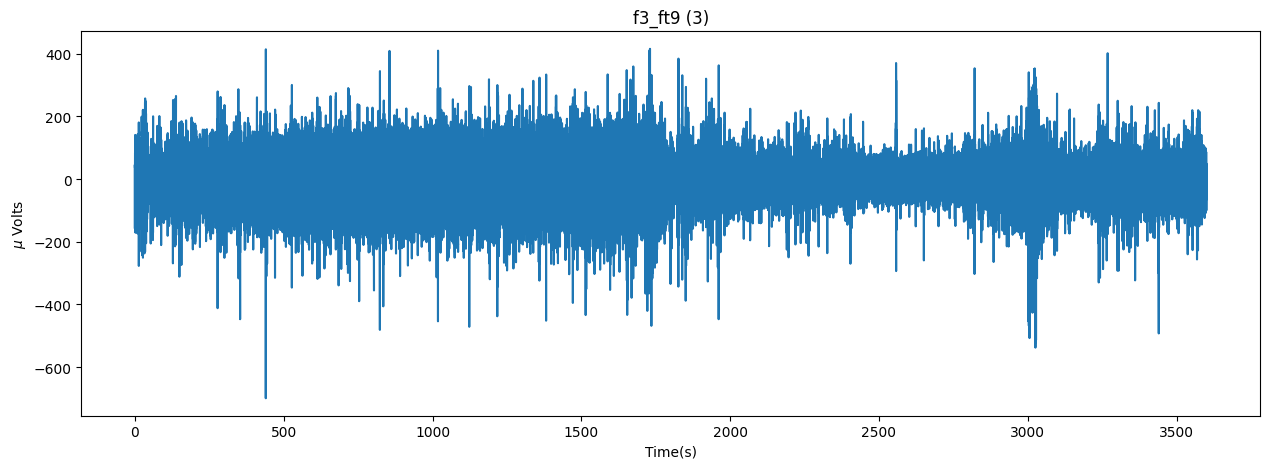

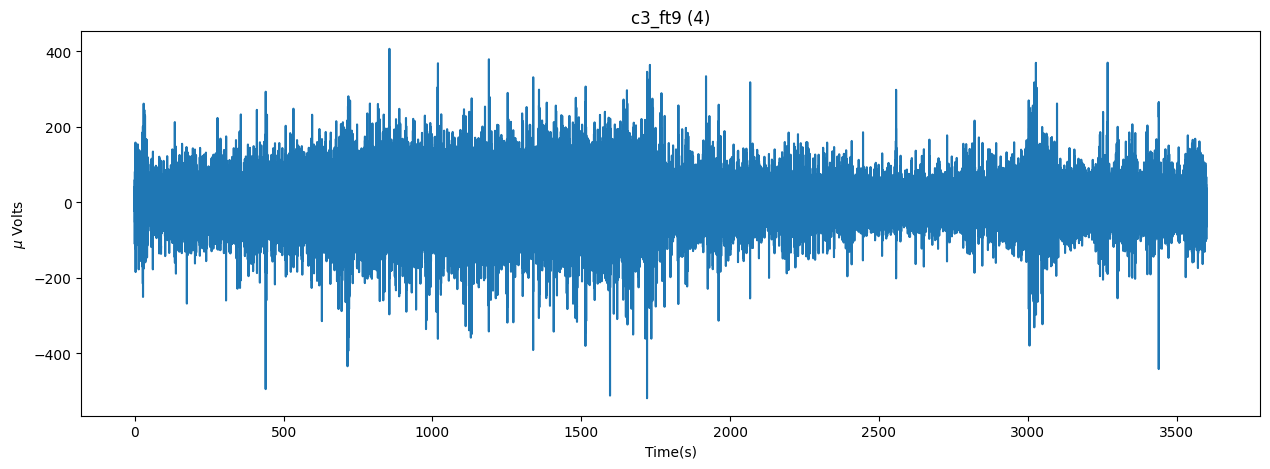

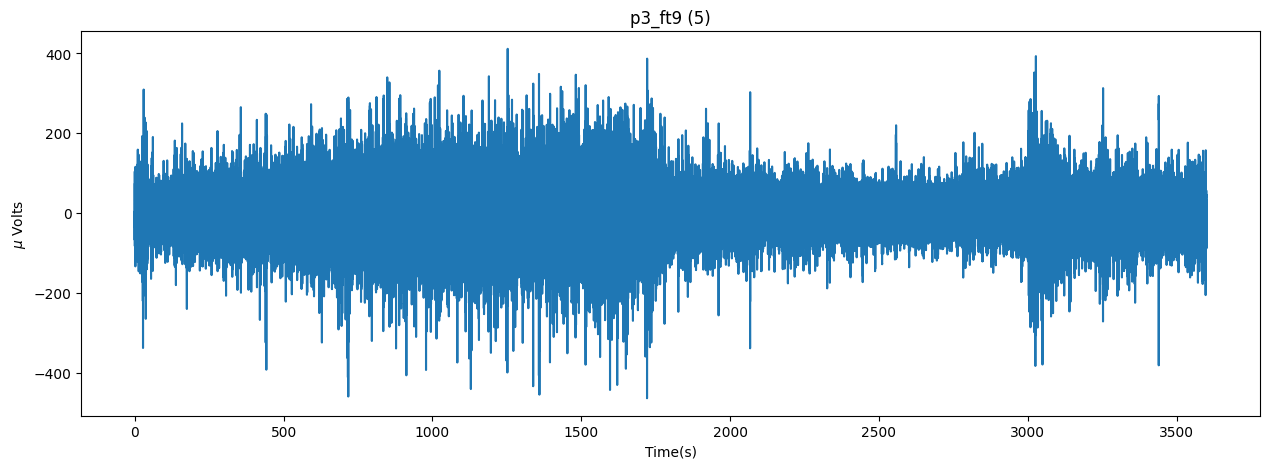

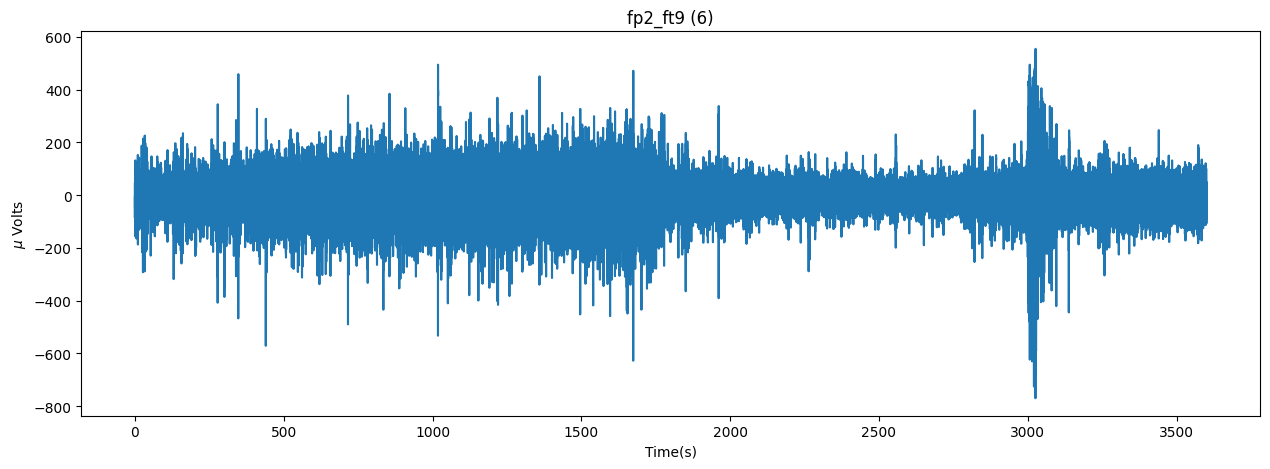

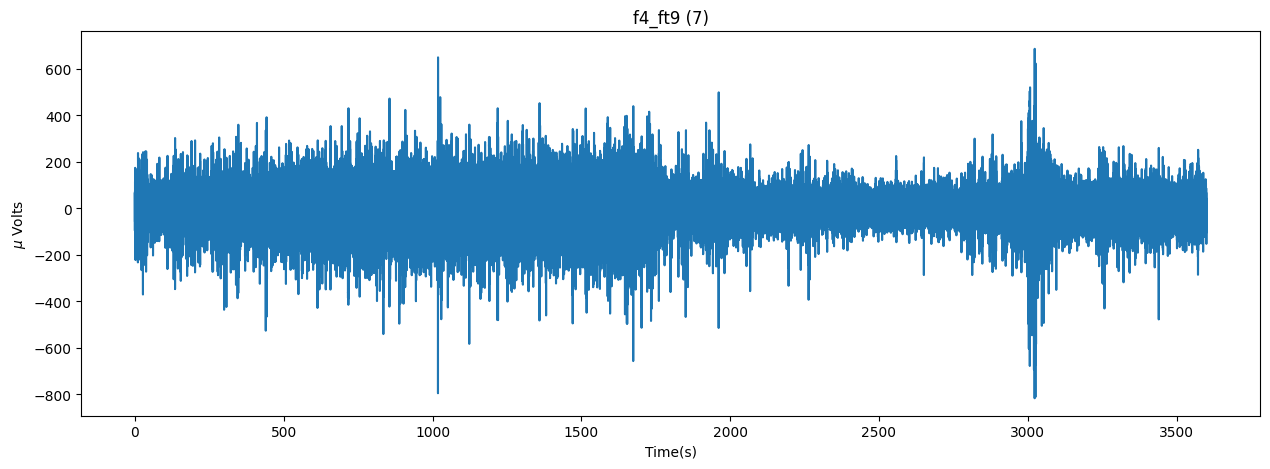

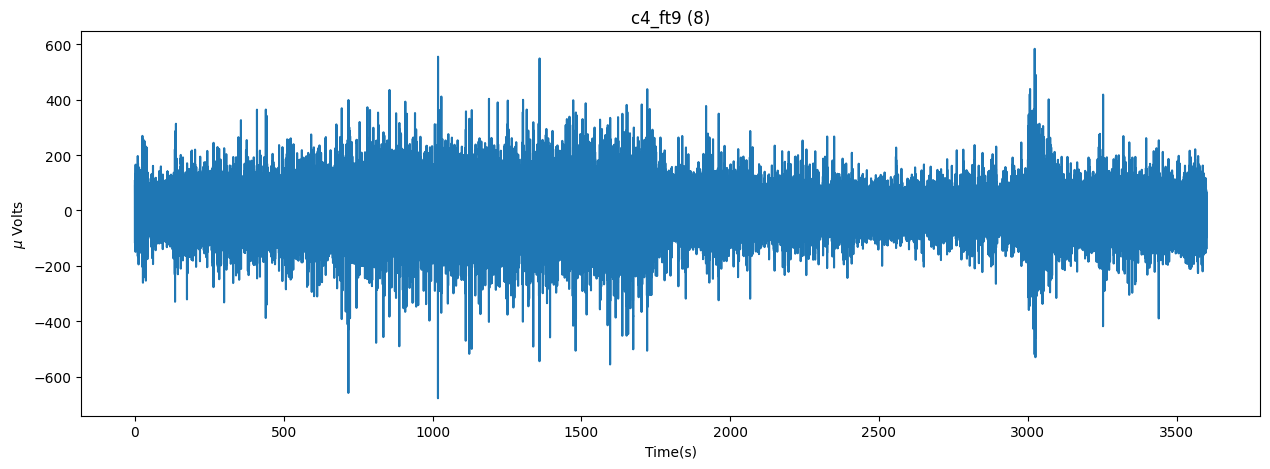

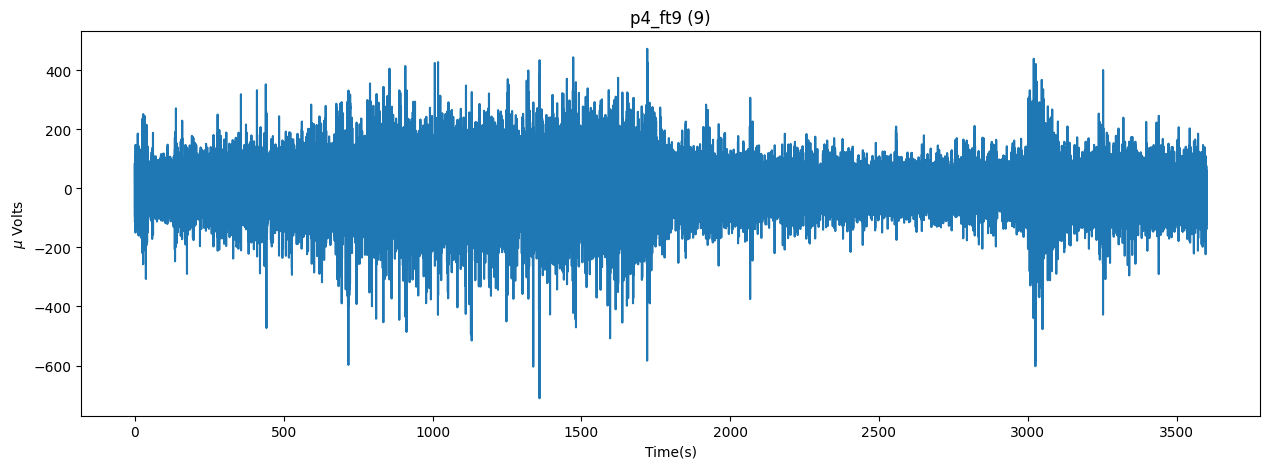

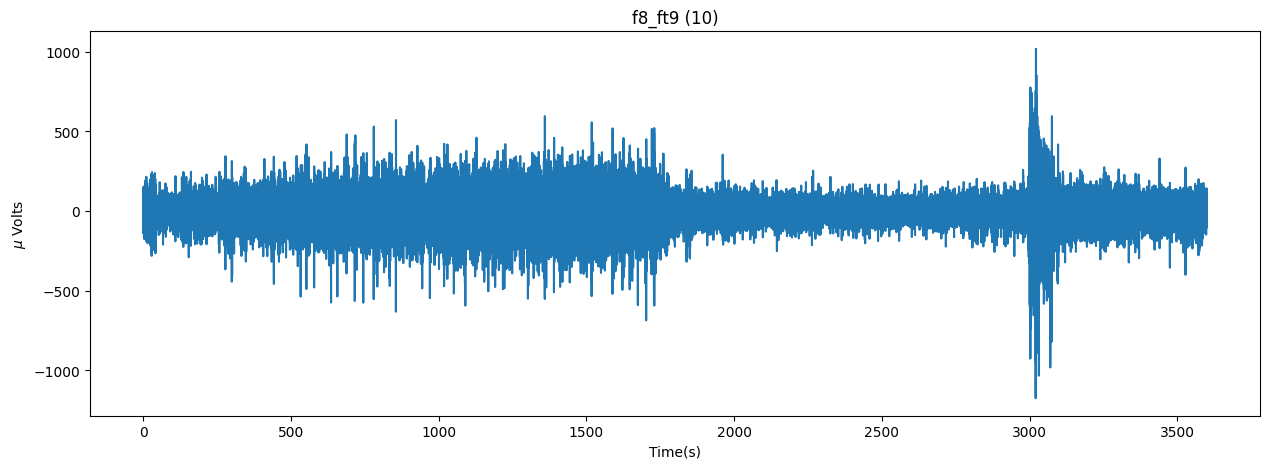

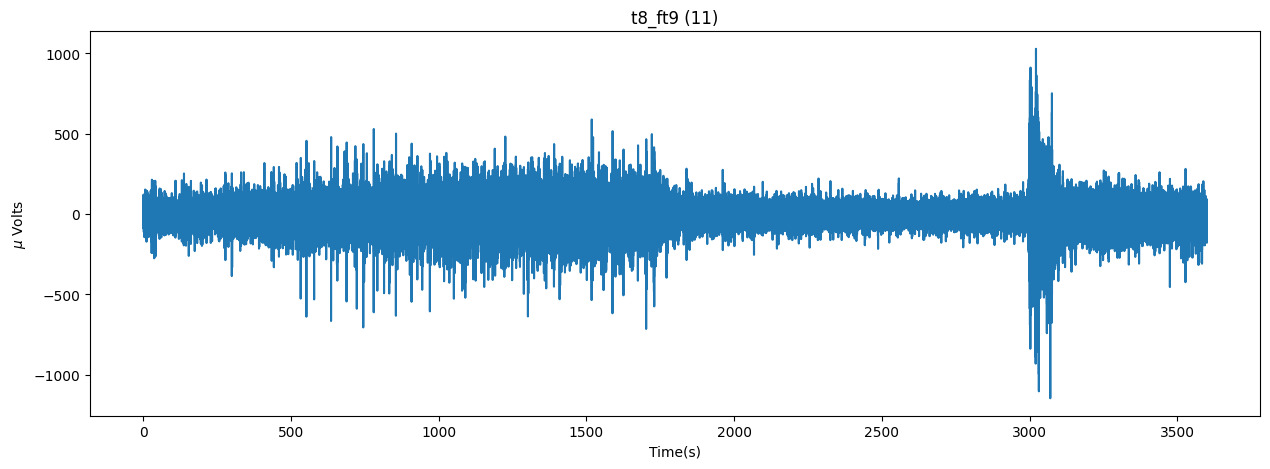

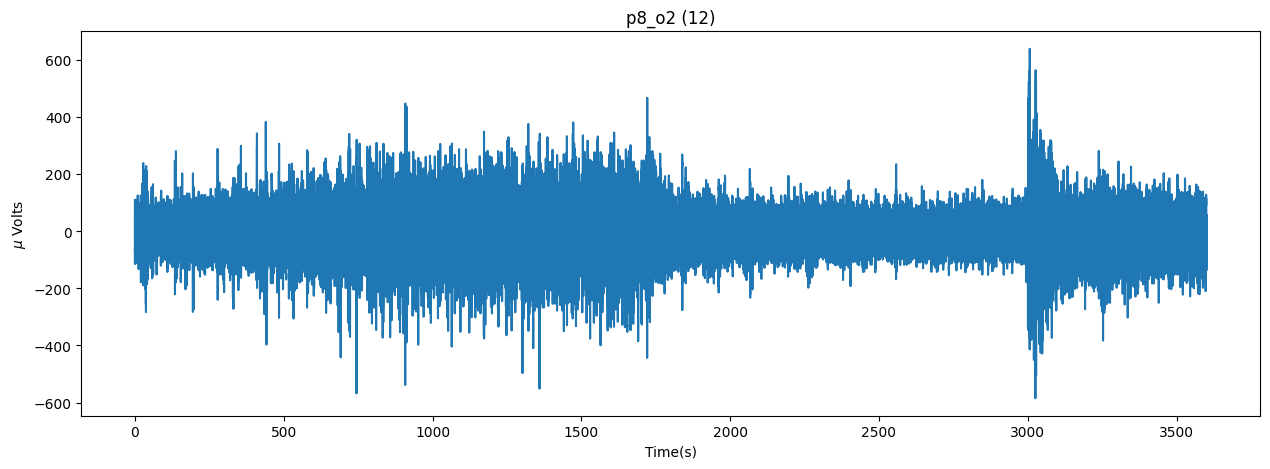

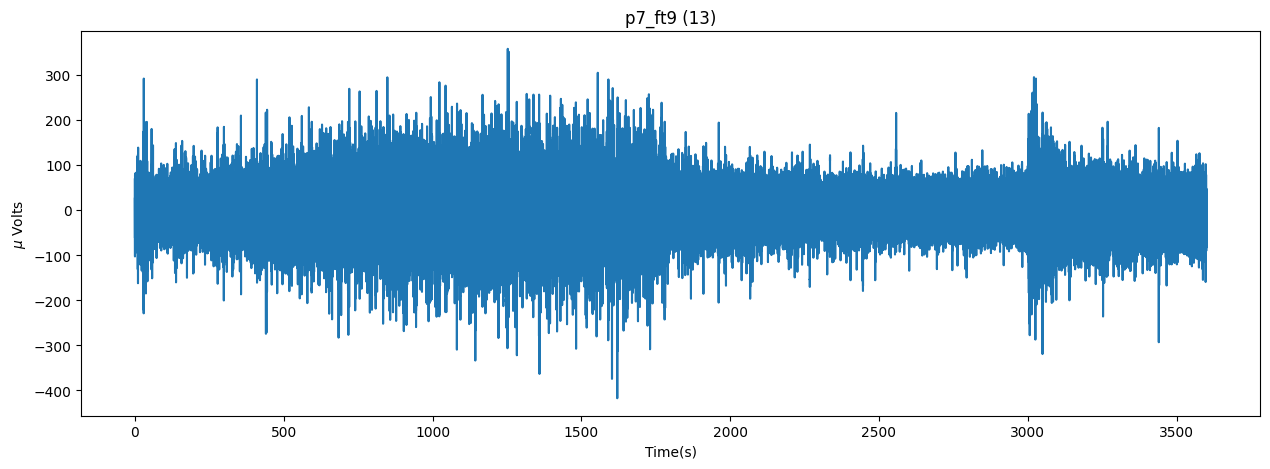

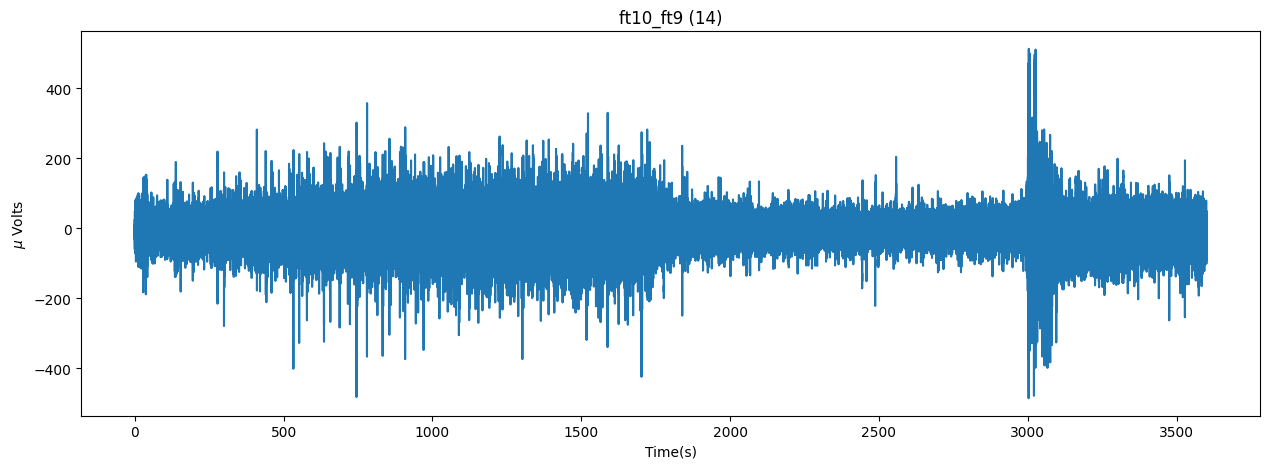

In [9]:
x = np.arange(0, 60*60, 1/256)
for i in range(15):
    plt.plot(x, data[i, :])
    plt.title(labels[i]+f" ({i})")
    plt.xlabel("Time(s)")
    plt.ylabel(f"$\mu$ Volts")
    plt.tight_layout(rect=[0, 1, 2, 2])
    plt.show()

In [14]:
seizure_data = np.concatenate([data[i, 7_66_976:7_77_216] for i in range(15)])
non_seizure_data = np.concatenate([(data[i, :7_66_976], data[i, 7_77_216:]) for i in range(15)])

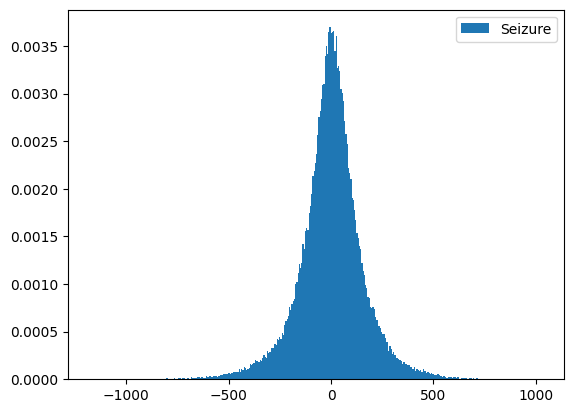

In [17]:
plt.hist(seizure_data, bins='auto', density=True, label='Seizure')
plt.legend()
plt.show()

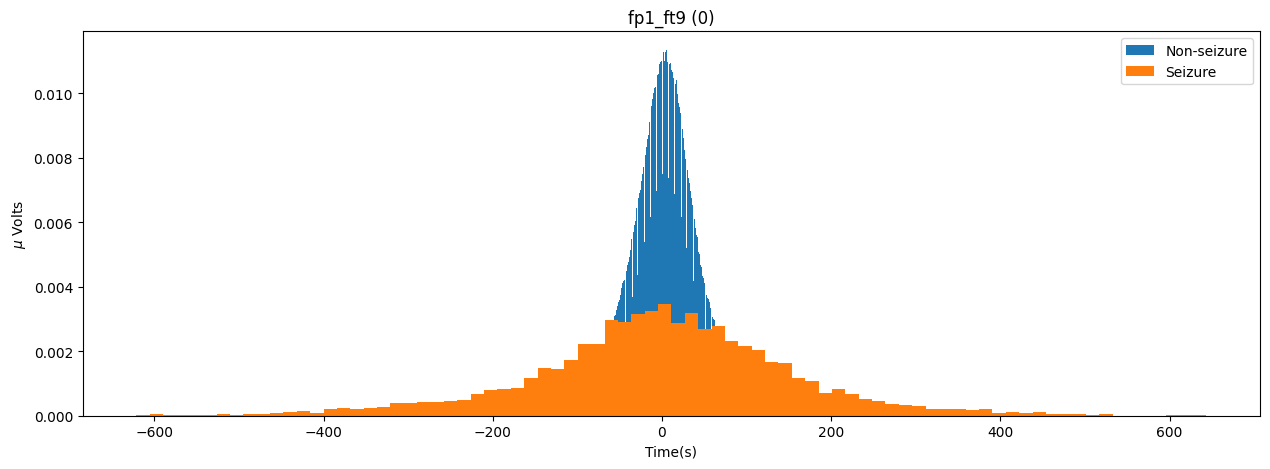

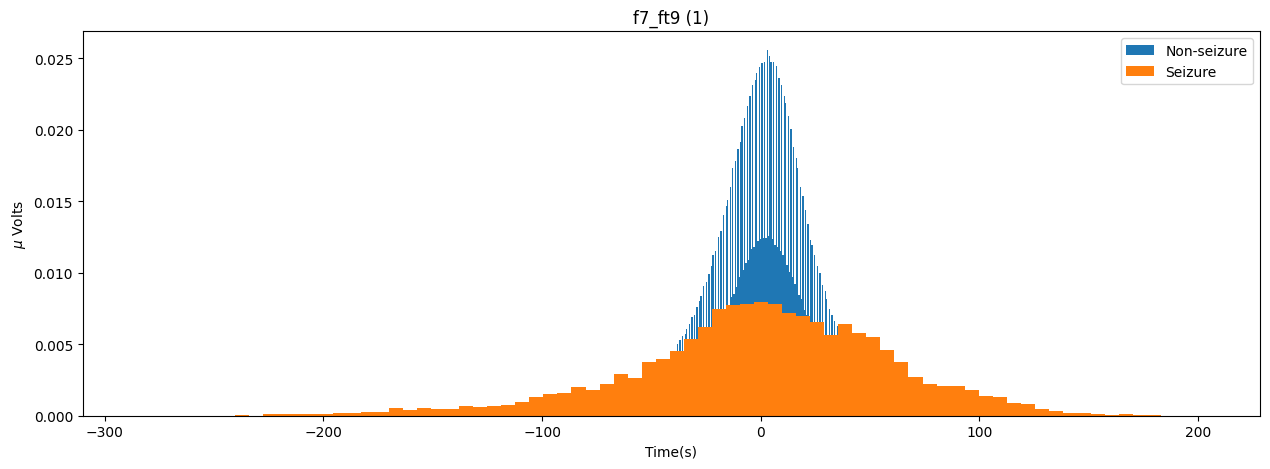

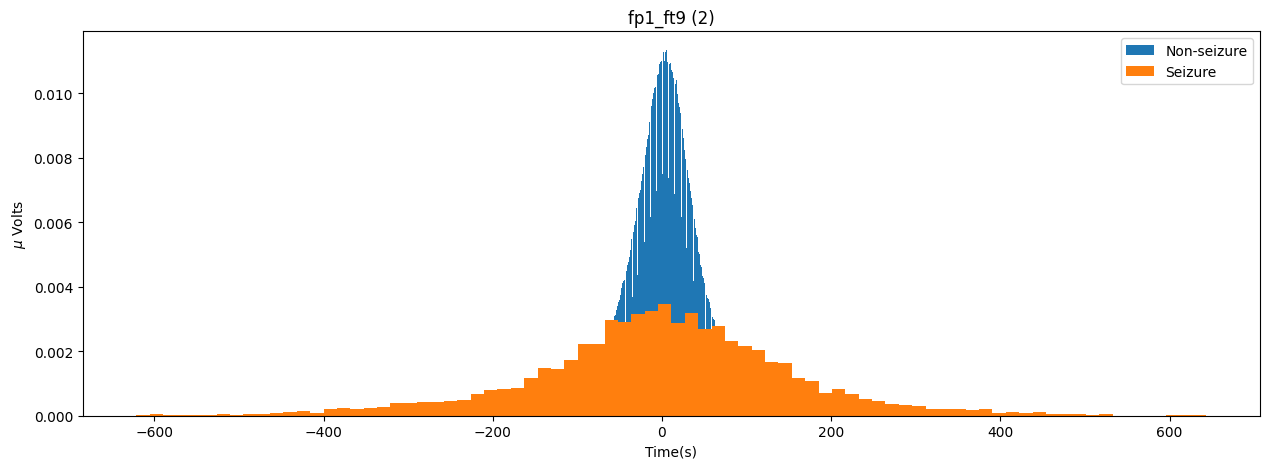

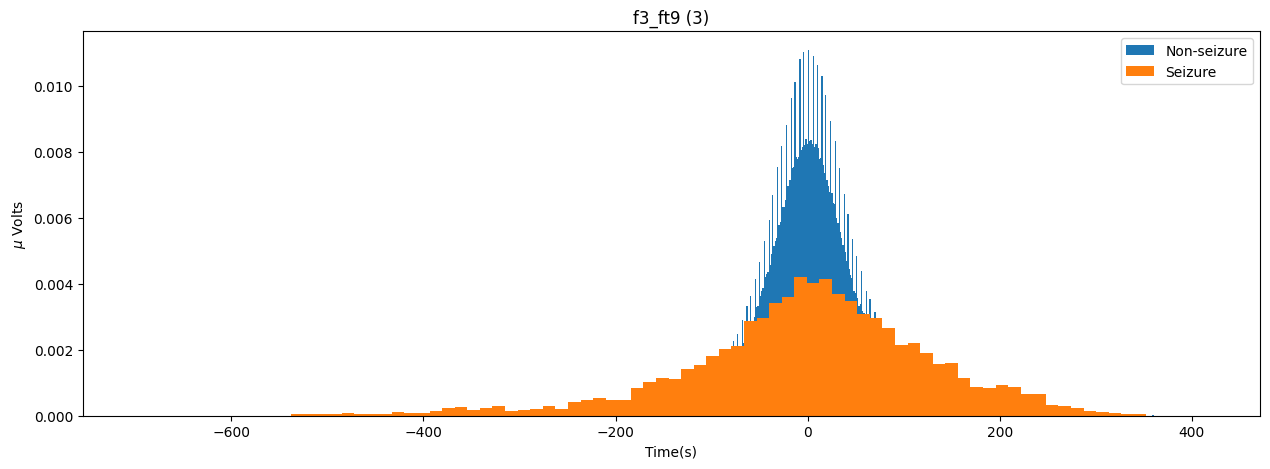

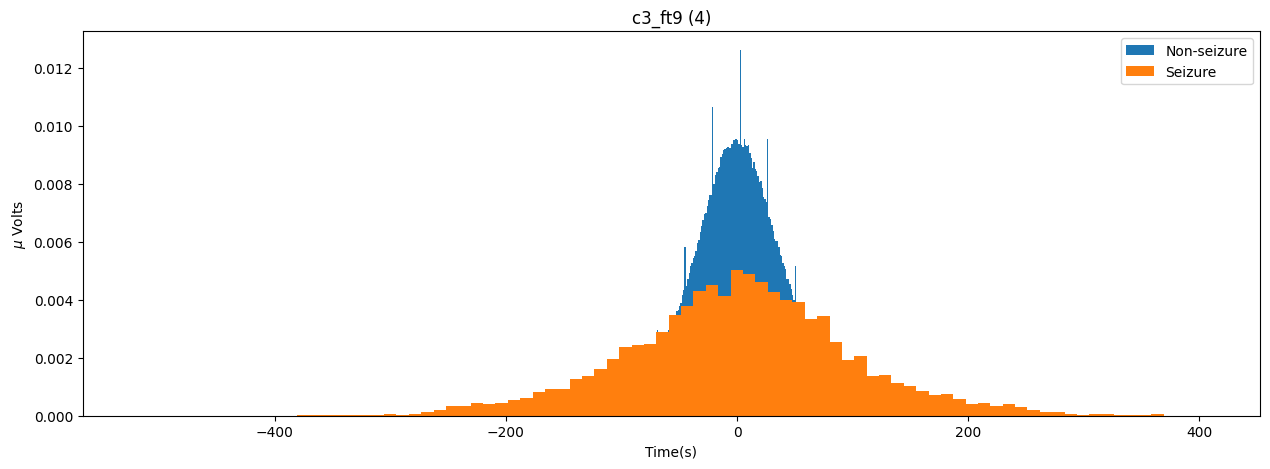

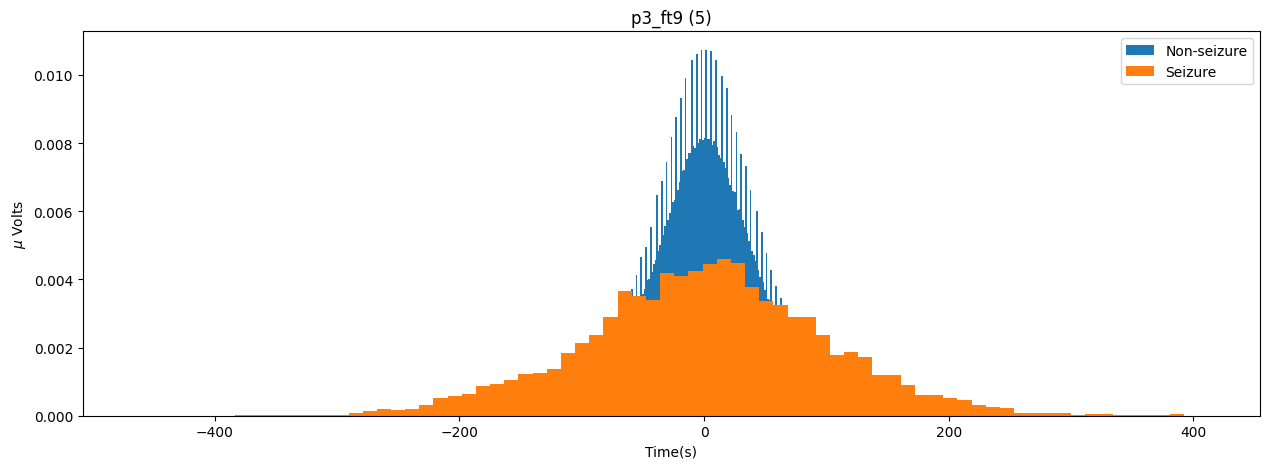

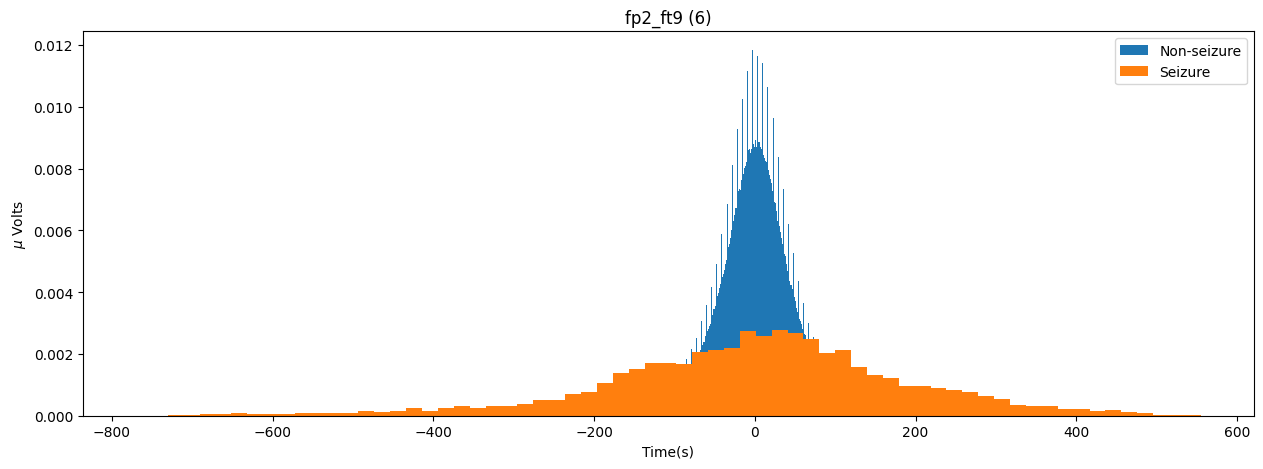

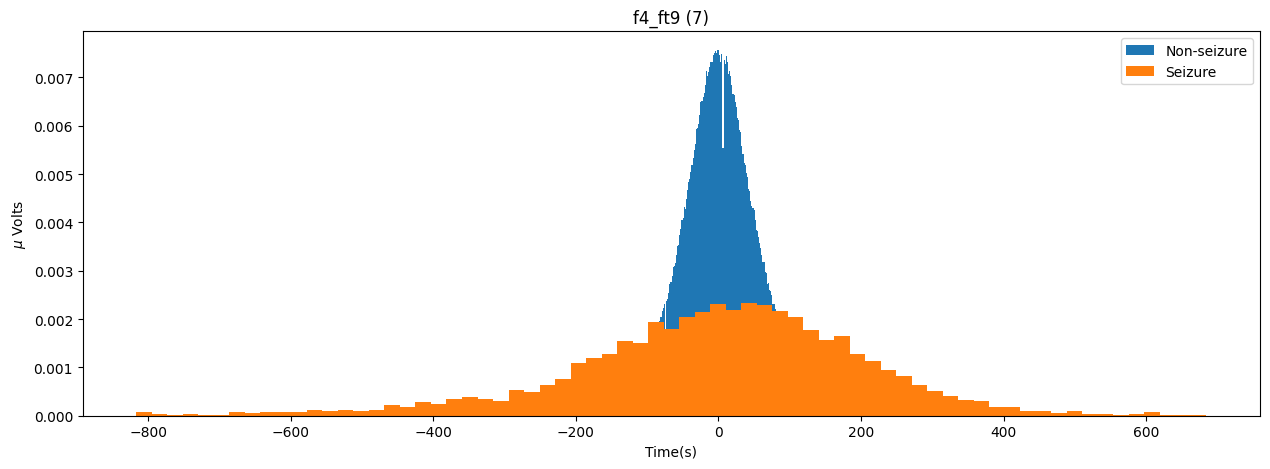

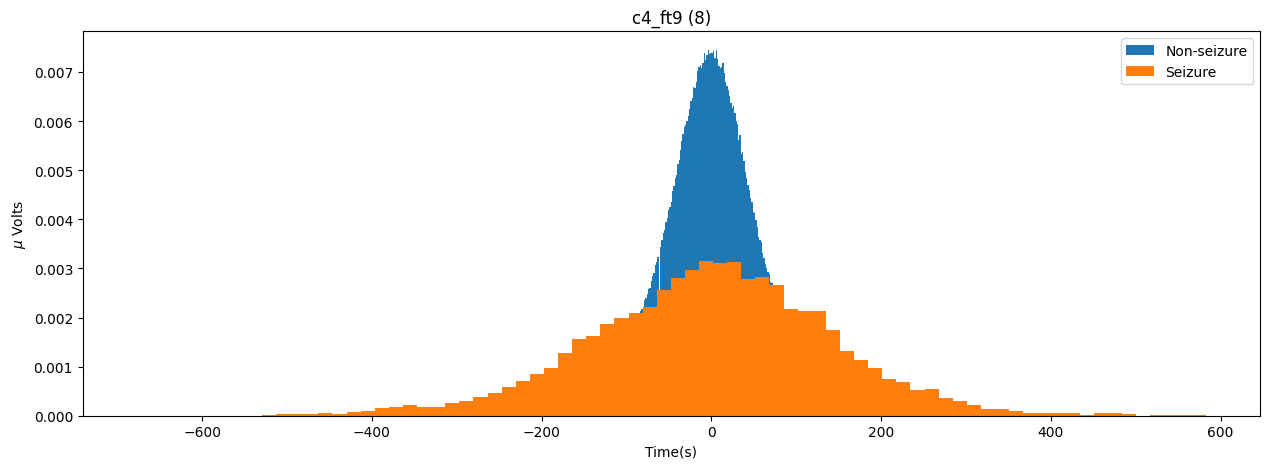

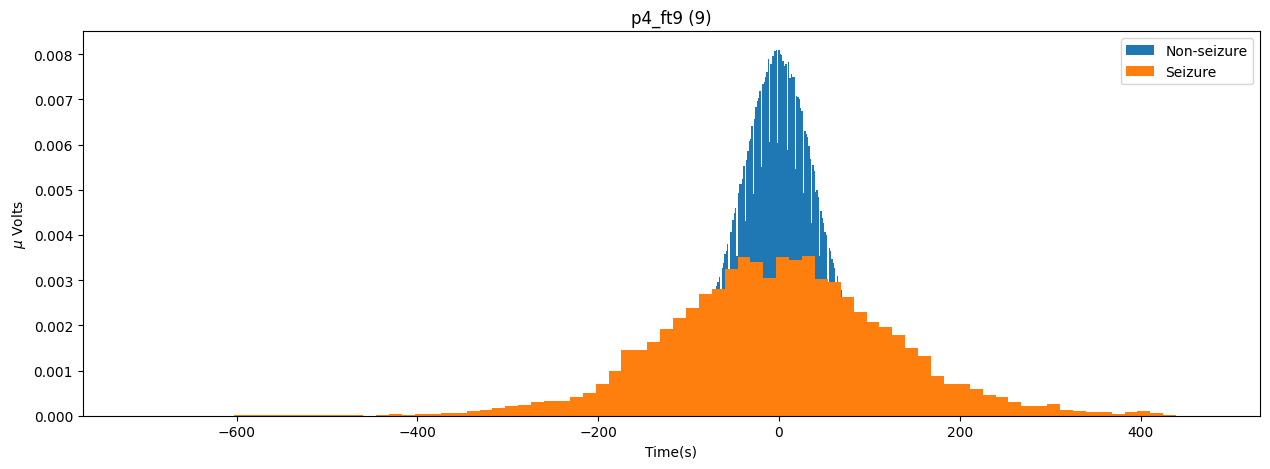

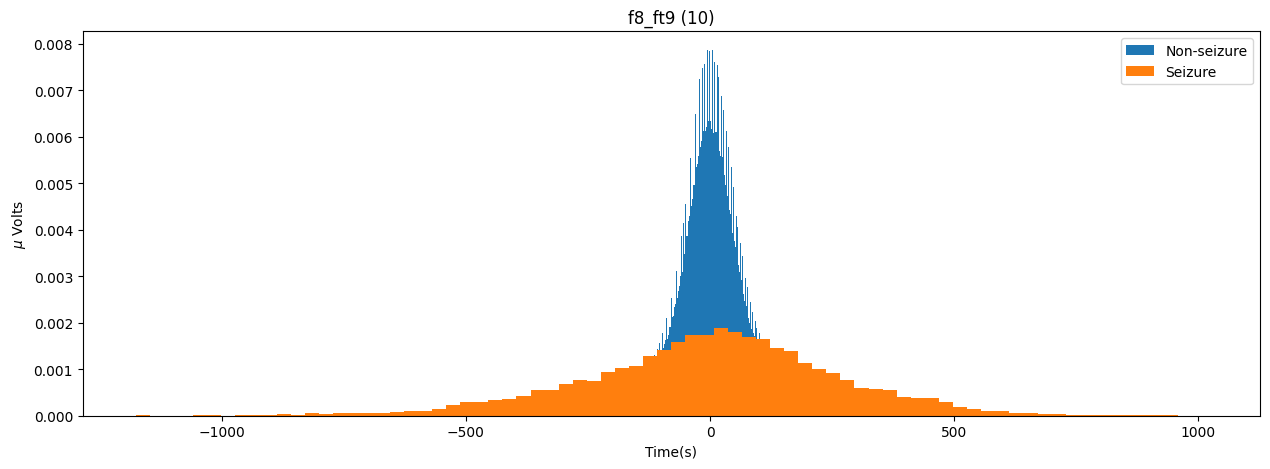

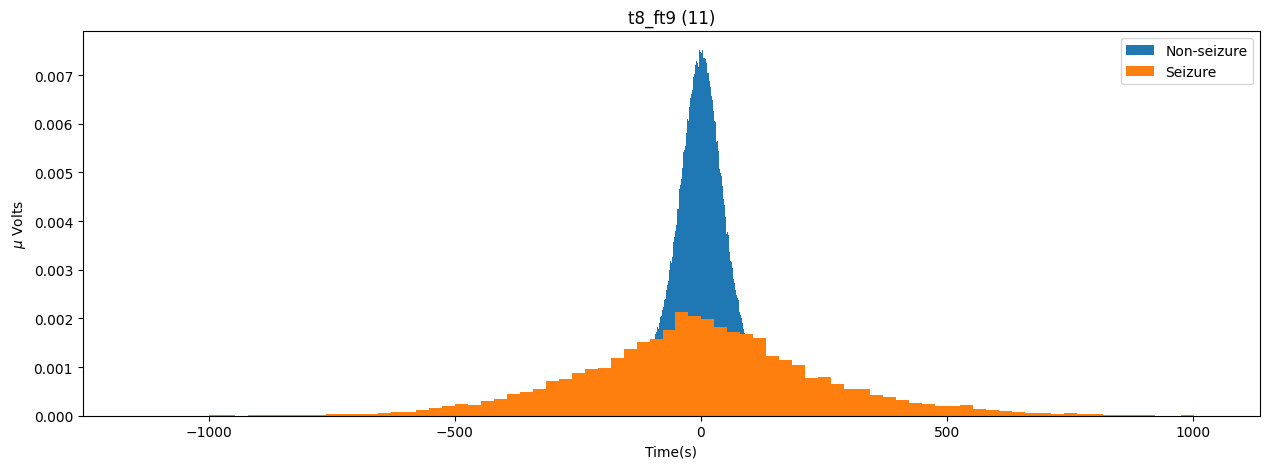

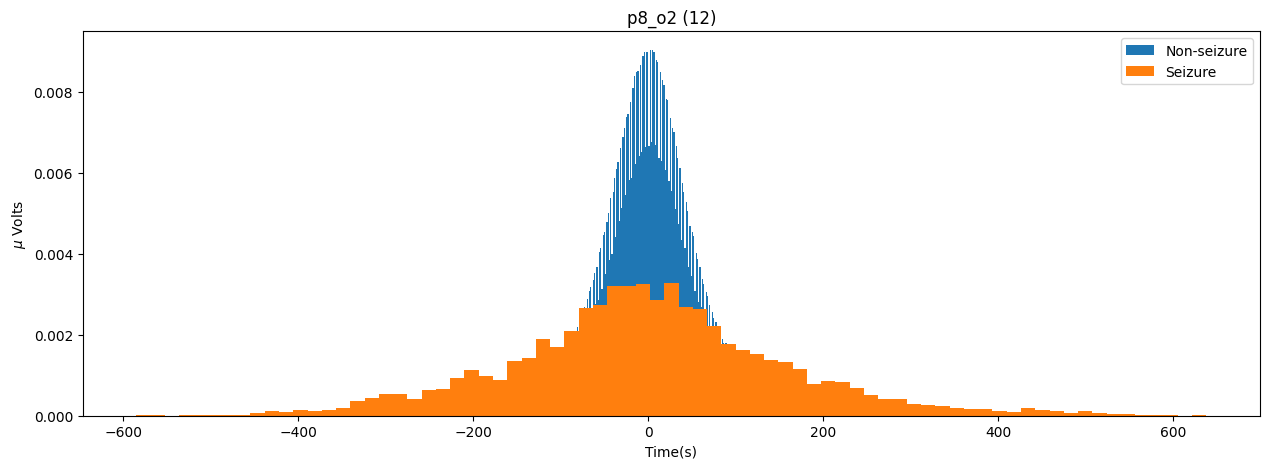

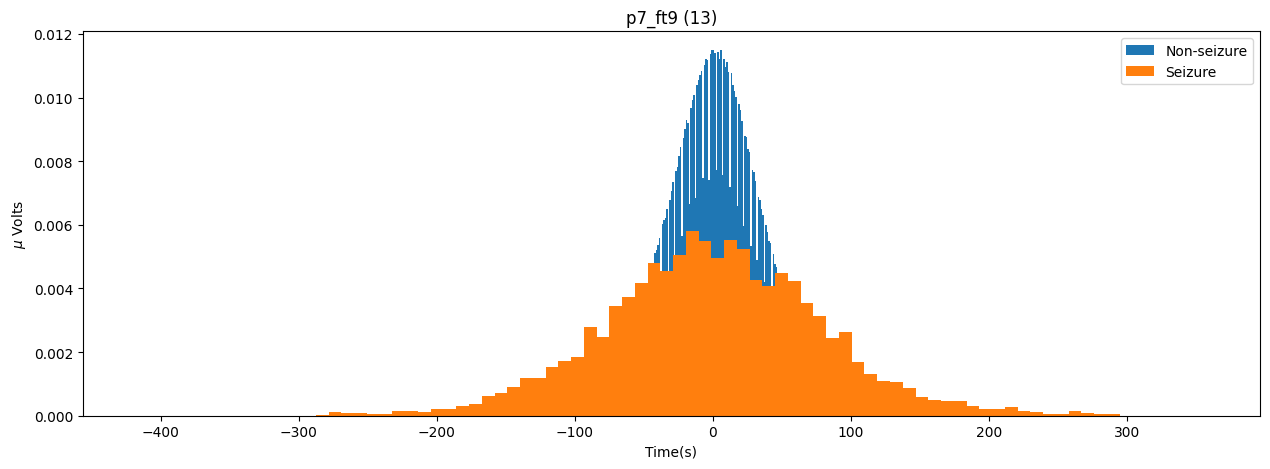

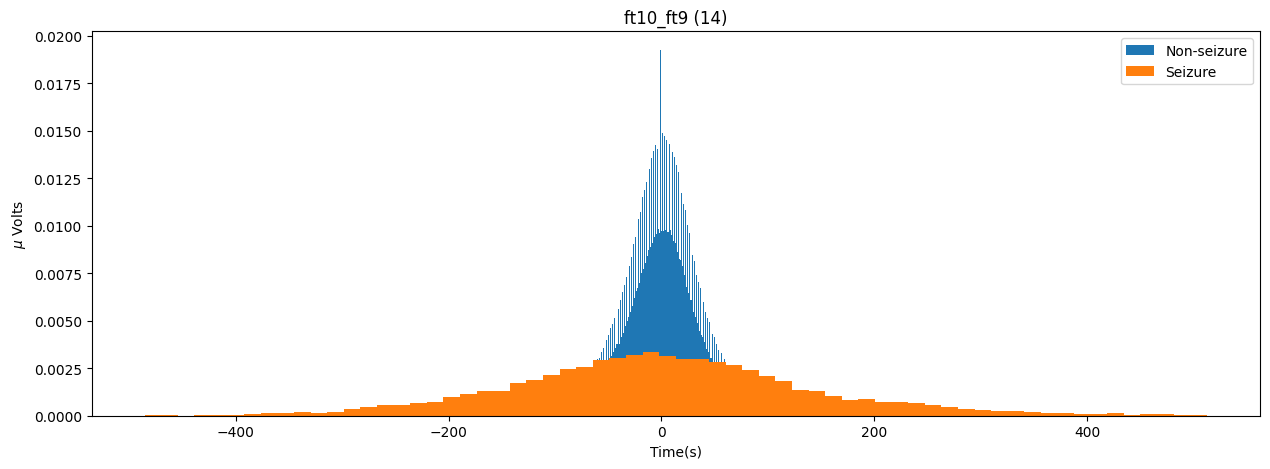

In [11]:
x = np.arange(0, 60*60, 1/256)
for i in range(15):
    plt.hist(np.concatenate((data[i, :7_66_976], data[i, 7_77_216:])), bins='auto', density=True)
    plt.hist(data[i, 7_66_976:7_77_216], bins='auto', density=True)
    plt.legend(["Non-seizure", "Seizure"])
    # plt.show()
    plt.title(labels[i]+f" ({i})")
    plt.xlabel("Time(s)")
    plt.ylabel(f"$\mu$ Volts")
    plt.tight_layout(rect=[0, 1, 2, 2])
    plt.show()

# To-do's
- Write function to re-reference all the data channels and store in seperate csv files preferably.
- Estimate pdfs of the seizure and non-seizure datasets.